b)
Matriz inicial
[0, 5, -1] [5]
[11, 0, 1] [14]
[1, -1, -1] [0]

Troca L1 e L2
[11, 0, 1] [14]
[0, 5, -1] [5]
[1, -1, -1] [0]

L3 --> L3 -0.09090909090909091*L1
[11, 0, 1] [14]
[0.0, 5.0, -1.0] [5.0]
[0.0, -1.0, -1.0909090909090908] [-1.2727272727272727]

L3 --> L3 +0.2*L2
[11, 0, 1] [14]
[0.0, 5.0, -1.0] [5.0]
[0.0, 0.0, -1.2909090909090908] [-0.2727272727272727]

Matriz escalonada
[11, 0, 1] [14]
[0.0, 5.0, -1.0] [5.0]
[0.0, 0.0, -1.2909090909090908] [-0.2727272727272727]

I1 = 1.2535211267605635
I2 = 1.0422535211267605
I3 = 0.2112676056338028

c)


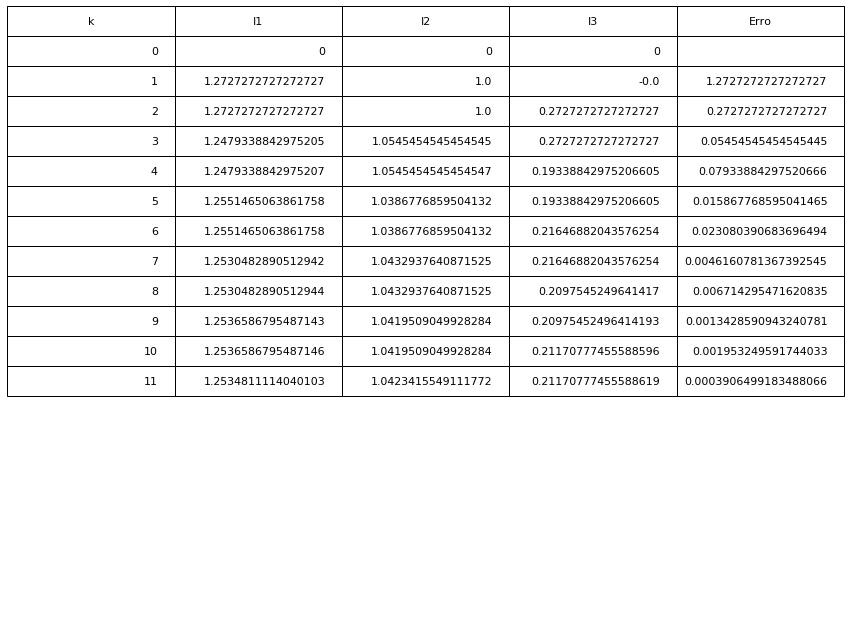

d)


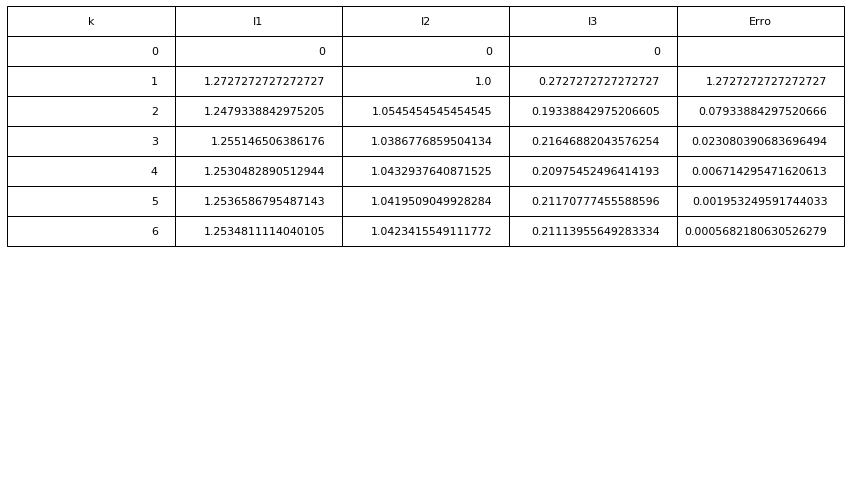

In [0]:
# O PROGRAMA CONTÉM DIFERENTES MÉTODOS COMPUTACIONAIS PARA SOLUÇÃO DE SISTEMAS NxN E OS COMPARA

Matriz=[[0,5,-1],[11,0,1],[1,-1,-1]]
Res=[5,14,0]

def TrocaLinhas(Mat,R,L1,L2): # Troca as linhas L1 e L2 do sistema
  A=CriaZeros(len(Mat),len(Mat))
  B=CriaZeros(len(R))
  for j in range(len(R)):
    B[j]=R[j]
    for i in range(len(Mat)):
      A[i][j]=Mat[i][j]
  for j in range(len(Mat)):
    A[L1][j]=Mat[L2][j]
    A[L2][j]=Mat[L1][j]
  B[L1]=R[L2]
  B[L2]=R[L1]
  return A,B

def AchaMax(V): # Encontra o índice do valor máximo de uma lista
  for j in range(len(V)):
    if V[j]==max(V): return j
    
def CriaMatriz(Mat):
  A=CriaZeros(len(Mat),len(Mat[0]))
  for i in range(len(Mat)):
    for j in range(len(Mat[0])):
      A[i][j]=Mat[i][j]
  return A

def CriaZeros(Lin,Col=0): # Cria uma lista ou matriz de elementos 0
  A=[]
  if Col==0:
    for i in range(Lin):
      A+=[0]
    return A      
  B=[]
  for i in range(Lin):
    for j in range(Col):
      B+=[0]
    A+=[B]
    B=[]
  return A

def PrintaSistema(Mat,R): # Printa o sistema dado
  for i in range(len(Mat)):
    print(Mat[i],[R[i]])
  print()
  
def Escalona(Mat,R,Printa='n'): # Escalona o sistema
  D=[]
  for i in range(len(R)):
    D+=[R[i]]
  if Printa=='s':
    print('Matriz inicial')
    PrintaSistema(Mat,R)
  for j in range(len(Mat)):
    A=CriaZeros(len(Mat)-j) # A é a lista da coluna dos pivos para o pivoteamento
    for i in range(len(Mat)-j):
      A[i]=Mat[i+j][j]
    if AchaMax(A)!=0:
      Mat,D=TrocaLinhas(Mat,D,j,j+AchaMax(A)) # Coloca o elemento máximo da coluna como sendo o pivo
      if Printa=='s':
        print('Troca L%s e L%s' %(j+1,1+j+AchaMax(A)))
        PrintaSistema(Mat,D)
    B=CriaMatriz(Mat)
    for i in range(len(Mat)-j-1): # Zera os elemtos abaixo do pivo
      for k in range(len(Mat)):
        B[i+1+j][k]=Mat[i+1+j][k]-Mat[j][k]*Mat[i+j+1][j]/Mat[j][j]
      D[i+1+j]=D[i+1+j]-D[j]*Mat[i+j+1][j]/Mat[j][j]
      if Mat[i+j+1][j]!=0:
        if Mat[i+j+1][j]>0:
          if Printa=='s':print('L%s --> L%s %s*L%s' %(2+i+j,2+i+j,-Mat[i+j+1][j]/Mat[j][j],1+j))
        else:
          if Printa=='s':print('L%s --> L%s +%s*L%s' %(2+i+j,2+i+j,-Mat[i+j+1][j]/Mat[j][j],1+j))
        if Printa=='s':PrintaSistema(B,D)
    Mat=CriaMatriz(B)
  if Printa=='s':
    print('Matriz escalonada')
    PrintaSistema(Mat,D)
  return Mat,D

def Checa(Mat,R): # Checa se o sistema de entrada é consistente
  for i in range(len(Mat)):
    if len(Mat)!=len(Mat[0]):
      print('Matriz inválida.')
      return 'false'
  if len(Mat)!=len(R):
    print('Sistema inválido')
    return 'false'
  return 'true'
  
def Gauss(Mat,R): # Metodo de Gauss
  if Checa(Mat,R)=='false': return
  A,B=Escalona(Mat,R,'s') # Escalona a matriz do sistema
  X=[] # Lista dos resultados
  for i in range(len(A)): # Encontra os valores para cada icognita
    x=B[len(Mat)-i-1]
    for j in range(len(X)):
      x=x-(X[j])*(A[len(A)-1-i][len(A)-1-j])
    x=x/A[len(A)-i-1][len(A)-i-1]
    X+=[x]
  for i in range(len(X)):
    print('I%s =' %(i+1),X[len(X)-i-1])

print('b)')
Gauss(Matriz,Res)

# Exercicio c)
import matplotlib.pyplot as plt

Matriz,Res=TrocaLinhas(Matriz,Res,0,1) # Troca as linhas 1 e 2 como pedido no enunciado

def Jacobi(Mat,R,Chute='nenhum',e=0.001): # Metodo de Jacobi
  if Checa(Mat,R)=='false': return
  if Chute=='nenhum': Chute=CriaZeros(len(Mat))
  k=0
  Chute=[k]+Chute+['']
  X=[Chute] # Matriz dos dados da tabela
  E=e+1 # Erro que será aproximado como max(xik+1-xik)
  while E>=e: # Método iterativo:
    A=[k+1]
    for i in range(len(Mat)):
      x=R[i]+X[k][1+i]*Mat[i][i]
      for j in range(len(Mat)):
        x-=(X[k][1+j])*(Mat[i][j])
      x=x/Mat[i][i]
      A+=[x]
    B=[]
    k+=1
    X+=[A]
    for i in range(len(Mat)):
      B+=[(X[k][i+1]-X[k-1][i+1])**2] # Lista dos erros xik+1
    E=(max(B))**(1/2) # O erro como o máximo da lista
    X[k]+=[E]
    A=[]
  Label=('k',) # Código para gerar a tabela
  for i in range(len(Mat)):
    Label+=('I%s' %(i+1),)
  Label+=('Erro',)
  plt.axis('off')
  table=plt.table(cellText=X,colLabels=Label,loc='top')
  table.scale(2.5,2.5)
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  plt.show()
  
def Seidel(Mat,R,Chute='nenhum',e=0.001): # Metodo de Gauss-Seidel
  if Checa(Mat,R)=='false': return
  if Chute=='nenhum': Chute=CriaZeros(len(Mat))
  k=0
  Chute=[k]+Chute+['']
  X=[Chute] # Matriz dos dados da tabela
  E=e+1 # Erro que será aproximado como max(xik+1-xik)
  while E>=e: # Método iterativo:
    A=[k+1]
    for i in range(len(Mat)):
      x=R[i]+X[k][1+i]*Mat[i][i]
      for j in range(len(Mat)-i):
        x-=(X[k][1+j+i])*(Mat[i][j+i])
      for j in range(i):
        x-=(A[1+j])*(Mat[i][j])
      x=x/Mat[i][i]
      A+=[x]
    B=[]
    k+=1
    X+=[A]
    for i in range(len(Mat)):
      B+=[(X[k][i+1]-X[k-1][i+1])**2] # Lista dos erros xik+1
    E=(max(B))**(1/2) # O erro como o máximo da lista
    X[k]+=[E]
    A=[]
  Label=('k',) # Código para gerar a tabela
  for i in range(len(Mat)):
    Label+=('I%s' %(i+1),)
  Label+=('Erro',)
  plt.axis('off')
  table=plt.table(cellText=X,colLabels=Label,loc='top')
  table.scale(2.5,2.5)
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  plt.show()

print()
print('c)')
Jacobi(Matriz,Res)
print('d)')
Seidel(Matriz,Res)